# Code exercises using NLP (Natural Language Processing)

### Importing libraries

In [1]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk # tokenizer for NLP
import numpy as np
import pandas as pd

from pylab import rcParams
from wordcloud import WordCloud
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split # Use to split dataset to test and train
from sklearn.linear_model import LogisticRegression # Model
from sklearn.metrics import accuracy_score # Model accuracy
from sklearn.metrics import f1_score # Model accuracy
from sklearn.ensemble import RandomForestClassifier # Model
from sklearn.feature_extraction.text import TfidfVectorizer # NLP: enegrams

%matplotlib inline

In [2]:
# rcParams['figure.figsize'] = 30, 60

### Import data

In [3]:
amazon_reviews = pd.read_csv('./Reviews.csv')
amazon_reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Split dataframe

In [4]:
df_amazon_reviews = amazon_reviews[:10000]
df_amazon_reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


#### Histogram by number of words

In [5]:
words_per_review = df_amazon_reviews.Text.apply(lambda x: len(x.split(" ")))

<AxesSubplot:>

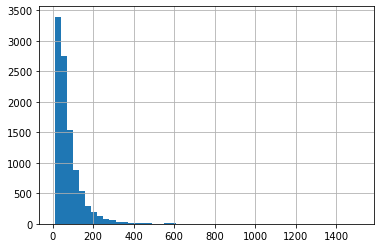

In [6]:
words_per_review.hist(bins = 50)

<AxesSubplot:>

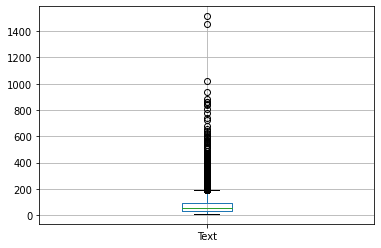

In [7]:
# Boxplot

pd.DataFrame(words_per_review).boxplot()

In [8]:
# Mean

words_per_review.mean()

77.9028

### Create a word cloud

In [11]:
word_cloud_text = ''.join(df_amazon_reviews.Text)
print(len(word_cloud_text))

4157740


In [19]:
wordcloud = WordCloud(
    max_font_size = 150,
    max_words = 50,
    background_color = 'white',
    scale = 10,
    width = 1400,
    height = 600
).generate(word_cloud_text)

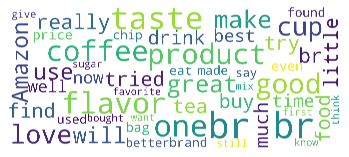

In [20]:
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Binary encoding

- For grades 4 and 5 -> 1
- For grades 1 and 2 -> 0
- Delete neutral (3)

In [23]:
df_amazon_reviews_bin = df_amazon_reviews
df_amazon_reviews_bin['sentiment_rating'] = np.where(df_amazon_reviews_bin.Score > 3, 1, 0)
df_amazon_reviews_bin

/tmp/ipykernel_5568/3863411939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_reviews_bin['sentiment_rating'] = np.where(df_amazon_reviews_bin.Score > 3, 1, 0)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,0
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...",1
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,1
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,1


In [27]:
df_amazon_reviews_bin = df_amazon_reviews_bin[df_amazon_reviews_bin.Score != 3]

In [28]:
df_amazon_reviews_bin['sentiment_rating'].value_counts()

1    7616
0    1522
Name: sentiment_rating, dtype: int64

<AxesSubplot:>

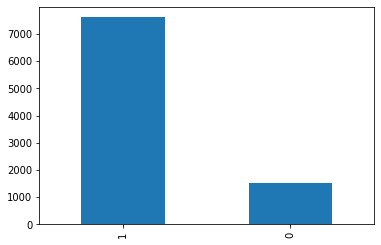

In [29]:
df_amazon_reviews_bin['sentiment_rating'].value_counts().plot.bar()

### Pre-processing for NLP

#### 1. Word to lower

In [34]:
df_amazon_reviews_nlp = df_amazon_reviews_bin
df_amazon_reviews_nlp['reviews_text'] = df_amazon_reviews_bin.Text.apply(lambda x: x.lower())
df_amazon_reviews_nlp.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_rating,reviews_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy at a great price. there was a wid...


#### 2. Delete special characters

In [36]:
special_chars = df_amazon_reviews_nlp['reviews_text'].apply(lambda x: [special_char for special_char in list(x) if not special_char.isalnum() and special_char != ' '])
special_chars

0                                               [., ., .]
1                                   [., ., ., ., ", ", .]
2       [., ,, -, ., ., ., ,, ., ., ., ., ', ", ,, ,, ...
3                                         [., (, ), ., .]
4                                         [., ., ., ,, .]
                              ...                        
9995                                            [., ., .]
9996    [,, ., ,, (, -, ), ., ', ., ', ,, ,, ., <, /, ...
9997    [., ., ., ., ., ., ., ,, ., ., ,, ,, (, ), ., ...
9998                                                  [.]
9999    [., ., ., ., ., ., ', ,, ., <, /, >, ., ,, ., ...
Name: reviews_text, Length: 9138, dtype: object

In [39]:
flat_list = [item for sublist in special_chars for item in sublist]
print(set(flat_list))

{')', '/', '!', '}', ';', '.', '<', '-', '$', '&', ',', '+', '~', '=', '@', '[', '_', '^', '%', '§', ':', '"', ']', '(', '?', '{', '*', "'", '`', '®', '>', '#'}


In [47]:
# Clean with Regex

import re

review_backup = df_amazon_reviews_nlp.reviews_text.copy()
review_backup


0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say, the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old... he had gas and constip...
Name: reviews_text, Length: 9138, dtype: object

In [48]:
df_amazon_reviews_nlp['reviews_text_new'] = df_amazon_reviews_nlp.reviews_text.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
df_amazon_reviews_nlp

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_rating,reviews_text,reviews_text_new
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,this is a confection that has been around a fe...,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy at a great price. there was a wid...,great taffy at a great price there was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,0,we switched from the advance similac to the or...,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...",1,"like the bad reviews say, the organic formula ...",like the bad reviews say the organic formula ...
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,1,i wanted to solely breastfeed but was unable t...,i wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,1,i love the fact that i can get this delieved t...,i love the fact that i can get this delieved t...


In [49]:
df_amazon_reviews_nlp.reviews_text_new[20]

'my husband is a twizzlers addict   we ve bought these many times from amazon because we re government employees living overseas and can t get them in the country we are assigned to   they ve always been fresh and tasty  packed well and arrive in a timely manner '

In [50]:
review_backup[20]

"my husband is a twizzlers addict.  we've bought these many times from amazon because we're government employees living overseas and can't get them in the country we are assigned to.  they've always been fresh and tasty, packed well and arrive in a timely manner."

#### 3. Delete stopwords (articles, connectors, etc...)

In [51]:
# StopWords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jota/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
noise_words = []
stop_words_corpus = nltk.corpus.stopwords
en_stop_words = stop_words_corpus.words('english')
noise_words.extend(en_stop_words)

In [54]:
print(len(noise_words))

179


##### Tokenize

In [56]:
# Tokenization

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jota/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [59]:
tokens_list = [word_tokenize(each) for each in df_amazon_reviews_nlp.Text]
tokens = [item for sublist in tokens_list for item in sublist]
len(set(tokens))

27510

In [58]:
tokens_list_lower = [word_tokenize(each) for each in df_amazon_reviews_nlp.reviews_text_new]
tokens_lower = [item for sublist in tokens_list_lower for item in sublist]
len(set(tokens_lower))

18039

In [62]:
one_percentile = int(len(set(tokens_lower)) * 0.01)
top_1_percentile = Counter(tokens_lower).most_common(one_percentile)
top_1_percentile[:10]

[('the', 28122),
 ('i', 25705),
 ('and', 19980),
 ('a', 18505),
 ('it', 16143),
 ('to', 15137),
 ('of', 12067),
 ('is', 11063),
 ('this', 10530),
 ('br', 9361)]

In [63]:
bottom_1_percentile = Counter(tokens_lower).most_common()[-one_percentile:]
bottom_1_percentile[:10]

[('pruchase', 1),
 ('slick', 1),
 ('cloured', 1),
 ('innocuous', 1),
 ('espensive', 1),
 ('marketer', 1),
 ('strofoam', 1),
 ('destroyers', 1),
 ('ruth', 1),
 ('gleaning', 1)]

In [65]:
# Delete noise words

noise_words.extend([word for word, val in top_1_percentile])
noise_words.extend([word for word, val in bottom_1_percentile])
len(noise_words)

539

#### 4. Lemmatization

Work with groups of words

In [74]:
# Import libraries

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jota/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jota/nltk_data...


In [69]:
# Example with Lancaster
print('Example with Lancaster')
print(lancaster.stem('trouble'))
print(lancaster.stem('troubleing'))
print(lancaster.stem('troubled'))

Example with Lancaster
troubl
troubl
troubl


In [75]:
# Example with WordNet
print('Example with WordNet')
print(lemmatizer.lemmatize('trouble', wordnet.NOUN))
print(lemmatizer.lemmatize('troubleing', wordnet.VERB))
print(lemmatizer.lemmatize('troubled', wordnet.VERB))

Example with WordNet
trouble
trouble
trouble
